In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df=pd.read_csv('../input/covid-19-indiacsv/covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,06:00 PM,Kerala,1,0,0,0,1
1,2,31-01-2020,06:00 PM,Kerala,1,0,0,0,1
2,3,01-02-2020,06:00 PM,Kerala,2,0,0,0,2
3,4,02-02-2020,06:00 PM,Kerala,3,0,0,0,3
4,5,03-02-2020,06:00 PM,Kerala,3,0,0,0,3


In [3]:
df['Total Cases'] = df['ConfirmedIndianNational'] + df['ConfirmedForeignNational']

In [4]:
df['Total Active'] = df['Confirmed'] - (df['Cured'] + df['Deaths'])
total_active = df['Total Active'].sum()
print("Total number of active cases across India : ",total_active)

Total number of active cases across India :  20410


In [5]:
dbd_India = pd.read_csv('../input/covid-19-india/Covid cases in India.csv',parse_dates=True)

In [6]:
dbd_India.head()

,S. No.,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Deaths
0,2,Andaman and Nicobar Islands,10,0,0
1,1,Andhra Pradesh,40,1,0
2,3,Bihar,15,0,1
3,4,Chandigarh,13,0,0
4,5,Chattisgarh,8,0,0


In [7]:
dbd_India['Total Active'] = dbd_India['Total Confirmed cases'] - (dbd_India['Cured/Discharged/Migrated'] + dbd_India['Deaths'])
total_active = dbd_India['Total Active'].sum()
print("Total number of active cases across India : ",total_active)

Total number of active cases across India :  1072


In [8]:
Tot_cases = df.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_cases.style.background_gradient(cmap="Blues")

,Total Active
State/UnionTerritory,
Maharashtra,3226
Kerala,2841
Tamil Nadu,1960
Delhi,1901
Rajasthan,1284
Uttar Pradesh,1267
Telengana,1265
Karnataka,1123
Gujarat,808


In [9]:
Tot_cases = dbd_India.groupby('Name of State / UT')['Total Confirmed cases'].sum().sort_values(ascending=False).to_frame()
Tot_cases.style.background_gradient(cmap="Reds")

,Total Confirmed cases
Name of State / UT,
Maharashtra,216
Kerala,105
Uttar Pradesh,101
Delhi,97
Karnataka,83
Telengana,79
Tamil Nadu,74
Rajasthan,74
Gujarat,73


In [10]:
dbd_India.head()

,S. No.,Name of State / UT,Total Confirmed cases,Cured/Discharged/Migrated,Deaths,Total Active
0,2,Andaman and Nicobar Islands,10,0,0,10
1,1,Andhra Pradesh,40,1,0,39
2,3,Bihar,15,0,1,14
3,4,Chandigarh,13,0,0,13
4,5,Chattisgarh,8,0,0,8


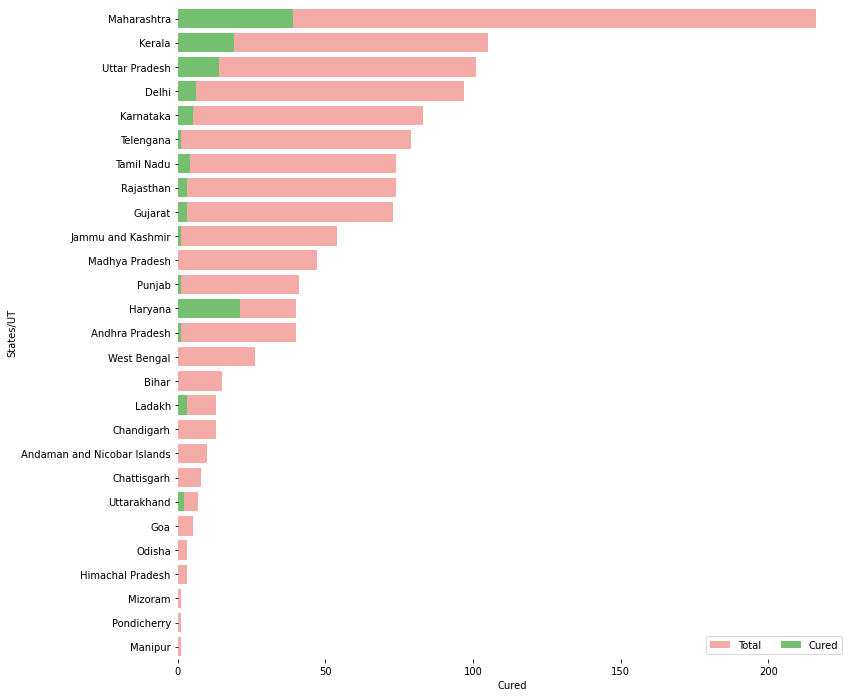

In [11]:
f, ax = plt.subplots(figsize=(12,12))
data = dbd_India[['Name of State / UT','Total Confirmed cases','Cured/Discharged/Migrated','Deaths']]
data.sort_values('Total Confirmed cases',ascending=False, inplace=True)

sns.set_color_codes('pastel')
sns.barplot(x="Total Confirmed cases", y="Name of State / UT", data=data, label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured/Discharged/Migrated", y="Name of State / UT", data=data, label="Cured", color="g")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="States/UT",xlabel="Cured",facecolor="white")
sns.despine(left=True, bottom=True)

In [12]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=dbd_India['Total Active'], mode='lines+markers',name ='Total Active'))
fig.update_layout(title_text="Coronvirus Cases in India") #plot_bgcolor='rgb(230,230,230)') 
fig.show()              


In [13]:
from fbprophet import Prophet

In [14]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Cured'].reset_index()
confirmed.head()

,Date,Confirmed
0,01-02-2020,2
1,01-03-2020,3
2,01-04-2020,1834
3,02-02-2020,3
4,02-03-2020,5


In [15]:
confirmed.sort_values("Date",axis=0, ascending=True, inplace=False)

,Date,Confirmed
0,01-02-2020,2
1,01-03-2020,3
2,01-04-2020,1834
3,02-02-2020,3
4,02-03-2020,5
...,...,...
62,29-03-2020,1024
63,30-01-2020,1
64,30-03-2020,1251
65,31-01-2020,1


In [16]:
confirmed.columns = ['ds', 'y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [17]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.head()

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-04
3,2020-01-30
4,2020-01-31


In [18]:
future.sort_values("ds",axis=0, ascending=True, inplace=False)

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-04
3,2020-01-30
4,2020-01-31
...,...
69,2020-12-06
70,2020-12-07
71,2020-12-08
72,2020-12-09


In [19]:
forecast = m.predict(future)
forecast[['ds','yhat', 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
69,2020-12-06,-90.809237,-1383.814368,1325.951759
70,2020-12-07,260.310448,-1119.108245,1523.740697
71,2020-12-08,194.154188,-1138.317461,1469.839120
72,2020-12-09,181.607788,-1139.235926,1539.677271
73,2020-12-10,-172.636581,-1486.767292,1133.664455


Text(45.5, 0.5, 'Cases')

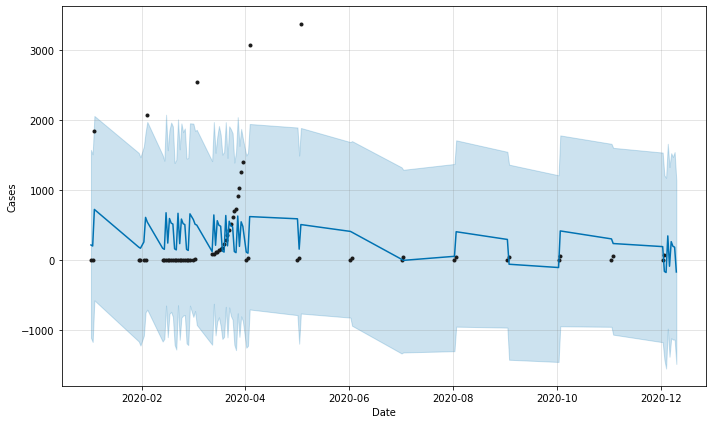

In [20]:
confirmed_forecast_plot = m.plot(forecast)
axes = confirmed_forecast_plot.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cases')

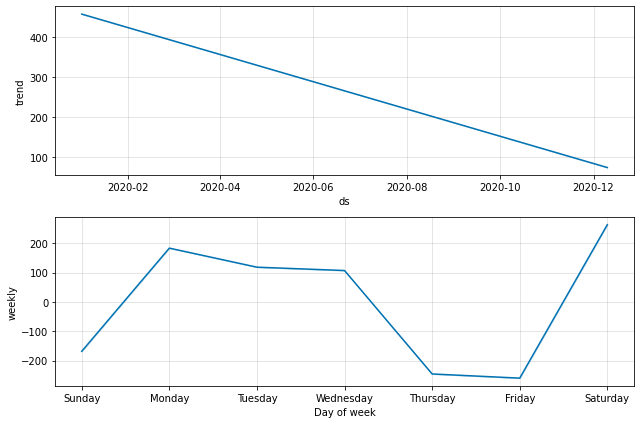

In [21]:
confirmed_forecast_plot = m.plot_components(forecast)

In [22]:
deaths.columns = ['ds', 'y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [23]:
m = Prophet()
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.head()

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-04
3,2020-01-30
4,2020-01-31


In [24]:
future.sort_values("ds",axis=0, ascending=True, inplace=False)

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-04
3,2020-01-30
4,2020-01-31
...,...
69,2020-12-06
70,2020-12-07
71,2020-12-08
72,2020-12-09


In [25]:
forecast = m.predict(future)
forecast[['ds','yhat', 'yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
69,2020-12-06,-2.848291,-23.973553,18.494627
70,2020-12-07,4.897052,-15.543629,25.781508
71,2020-12-08,4.054366,-17.485668,26.125652
72,2020-12-09,3.223449,-17.763529,24.861713
73,2020-12-10,-5.147656,-25.944885,15.645771


Text(58.0, 0.5, 'Cases')

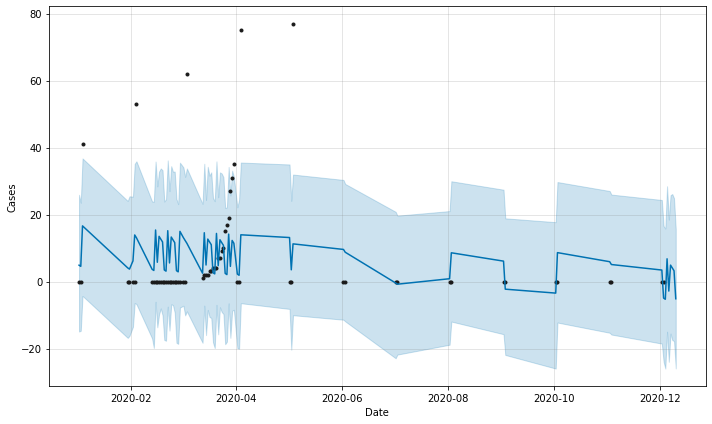

In [26]:
deaths_forecast_plot = m.plot(forecast)
axes = deaths_forecast_plot.get_axes()
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cases')

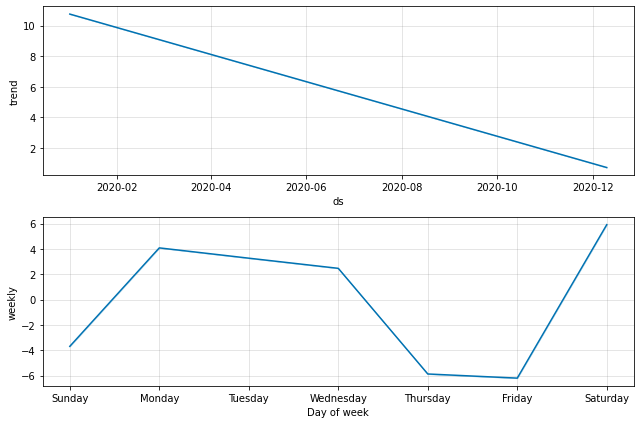

In [27]:
deaths_forecast_plot = m.plot_components(forecast)